In [3]:
'''
Authors: Daniel M. Low
License: See license in github repository
'''

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import json
import pickle

pd.set_option("display.max_columns", None)

import llm
# or: from construct_tracker import llm

on_colab = False

if on_colab:
  from google.colab import drive
  project_name = 'project_name'
  drive.mount('/content/drive')
  input_dir = f'/content/drive/MyDrive/datum/{project_name}/data/input/'
  output_dir = f'/content/drive/MyDrive/datum/{project_name}/data/output/'
else:
  input_dir = './data/'
  output_dir = './data/output/'

os.makedirs(output_dir, exist_ok=True)



In [8]:
df = pd.read_csv('./../../data/datasets/social_media/reddit/reddit_13_mental_health_4600-posts_20250311_123431.csv')
df

,subreddit,id,title,author,created_utc,score,upvote_ratio,num_comments,url,is_self,selftext,sort_method,time_filter,title_text,word_count
0,SuicideWatch,1b14zq4,Life without a man's love is a life of rape,Lover_of_Henry,2024-02-27 01:22:07,60,0.68,58,https://www.reddit.com/r/SuicideWatch/comments...,True,Love is a form of protection. The only thing t...,controversial,all,Life without a man's love is a life of rape \n...,300
1,SuicideWatch,1ai9395,This world is just so disgusting FUCK THIS,Cold_Tomatillo_8095,2024-02-03 18:13:51,150,0.96,30,https://www.reddit.com/r/SuicideWatch/comments...,True,"In my opinion, there is nothing good about thi...",top,year,This world is just so disgusting FUCK THIS \n-...,320
2,SuicideWatch,1fupnvq,I want a car to hit me,NaN,2024-10-02 16:06:12,112,0.99,33,https://www.reddit.com/r/SuicideWatch/comments...,True,I'm so tired but I don't wanna be remembered a...,top,year,I want a car to hit me \n---\n I'm so tired bu...,42
3,SuicideWatch,1igko6w,I would love to be dead,Little-cub-,2025-02-03 03:38:56,9,0.91,1,https://www.reddit.com/r/SuicideWatch/comments...,True,"I don't say this out of sadness or anything, o...",top,month,I would love to be dead \n---\n I don't say th...,185
4,SuicideWatch,1ifme42,I desperately need someone to be there for me ...,velvetinchainz,2025-02-01 20:53:22,15,0.86,6,https://www.reddit.com/r/SuicideWatch/comments...,True,"So for some quick context, I’m 22, F, I’ve suf...",top,month,I desperately need someone to be there for me ...,645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59759,GriefSupport,1j4v42l,"Has anyone said something hurtful, or treated ...",jaemk2,2025-03-06 08:11:22,25,1.00,19,https://www.reddit.com/r/GriefSupport/comments...,True,My grandmother passed a few years ago. We love...,top,month,"Has anyone said something hurtful, or treated ...",256
59760,GriefSupport,1j6ayhf,So much Anger,EnchantedBaguetteOWO,2025-03-08 01:17:24,2,1.00,0,https://www.reddit.com/r/GriefSupport/comments...,True,I've dealt with plenty of grief throughout my ...,top,week,So much Anger \n---\n I've dealt with plenty o...,62
59761,GriefSupport,1ieja8j,After 3 years still can't see the photos,dogchicken81,2025-01-31 11:53:41,0,0.50,0,https://www.reddit.com/r/GriefSupport/comments...,True,It's been three years and still can't see the ...,controversial,all,After 3 years still can't see the photos \n---...,81
59762,GriefSupport,1j4lnva,I miss being able to do normal things,bobolly,2025-03-05 21:56:04,61,1.00,5,https://i.redd.it/xsvrsr92izme1.jpeg,False,NaN,top,month,I miss being able to do normal things,8


In [9]:
df['subreddit'].unique()

array(['SuicideWatch', 'relationship_advice', 'depression', 'selfharm',
       'AskLGBT', 'bullying', 'abusesurvivors', 'lonely',
       'EatingDisorders', 'Anxiety', 'addiction', 'sexualassault',
       'GriefSupport'], dtype=object)

In [10]:
df = df[df['subreddit'] == 'EatingDisorders']
df

,subreddit,id,title,author,created_utc,score,upvote_ratio,num_comments,url,is_self,selftext,sort_method,time_filter,title_text,word_count
36800,EatingDisorders,1djksg6,Do you ever stop hating your body?,farmathekarma,2024-06-19 10:39:04,36,0.98,19,https://www.reddit.com/r/EatingDisorders/comme...,True,So I've always had a history of disordered eat...,top,all,Do you ever stop hating your body? \n---\n So ...,172
36801,EatingDisorders,15p3x44,I ate it all!!,cutepiggie5415,2023-08-12 08:55:51,67,1.00,16,https://www.reddit.com/r/EatingDisorders/comme...,True,Ive been really struggling recently to keep fo...,top,all,I ate it all!! \n---\n Ive been really struggl...,48
36802,EatingDisorders,dvq3pm,Request: Seeking participants for academic res...,EDPostRequests,2019-11-13 05:50:59,5,0.67,1,https://www.reddit.com/r/EatingDisorders/comme...,True,"Hi, I am a few years in recovery from my ED, ...",controversial,all,Request: Seeking participants for academic res...,112
36803,EatingDisorders,1irhfxc,Im a binge eater i cannot stop i need advices,Fearless-Ice-2959,2025-02-17 06:05:45,1,1.00,0,https://www.reddit.com/r/EatingDisorders/comme...,True,I keep binge eating for years now and its dest...,new,NaN,Im a binge eater i cannot stop i need advices ...,79
36804,EatingDisorders,vmdg91,Why do I have to gain weight in E.D recovery i...,HNrose11,2022-06-27 23:35:51,57,0.97,26,https://www.reddit.com/r/EatingDisorders/comme...,True,I’m at a normal and “healthy weight” for my ag...,top,all,Why do I have to gain weight in E.D recovery i...,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,EatingDisorders,1ilrrkm,"I feel my ""new"" body is not economically or et...",The4fandoms,2025-02-09 17:57:54,25,0.96,18,https://www.reddit.com/r/EatingDisorders/comme...,True,Back in 2023 to early 2024. I received ED trea...,top,month,"I feel my ""new"" body is not economically or et...",404
41396,EatingDisorders,1f3wu45,how to unlearn calories,No_Belt7130,2024-08-29 03:53:46,156,0.99,76,https://www.reddit.com/r/EatingDisorders/comme...,True,I kind of feel like the people outside of the ...,controversial,year,how to unlearn calories \n---\n I kind of feel...,74
41397,EatingDisorders,8ovfct,Request: wondering if it is possible to have a...,EDPostRequests,2018-06-05 18:54:11,5,0.77,1,https://www.reddit.com/r/EatingDisorders/comme...,True,Just to clarify at the beginning I’m not tryin...,controversial,all,Request: wondering if it is possible to have a...,428
41398,EatingDisorders,fqp7wj,"ventured out for groceries, found monster zero...",cutecounterculture,2020-03-28 14:08:55,700,0.97,37,https://www.reddit.com/r/EDAnonymous/comments/...,True,i’ve never felt so judged at a check out count...,top,all,"ventured out for groceries, found monster zero...",145


In [30]:

# Compute ngram frequency of column title_text

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 4), stop_words='english')
ngram_counts = vectorizer.fit_transform(df['title_text'])
ngram_counts

# Get feature names and counts
feature_names = vectorizer.get_feature_names_out()
counts = ngram_counts.sum(axis=0).A1

# Create dataframe of ngram frequencies
ngram_freq = pd.DataFrame({
    'ngram': feature_names,
    'frequency': counts
})

# Sort by frequency descending
ngram_freq = ngram_freq.sort_values('frequency', ascending=False)

# Display top 20 most frequent ngrams
print("Top 20 most frequent ngrams:")
print(ngram_freq.head(20))

# Save results
ngram_freq





Top 20 most frequent ngrams:
                  ngram  frequency
218393           eating       6133
443448             like       5120
407779             just       5112
208381              eat       4450
194513              don       4085
834558           weight       4077
268671             feel       3898
423010             know       3656
802851               ve       3593
288222             food       3232
816125             want       2881
604137           really       2659
230915               ed       2362
758457             time       2248
359841             help       2142
78128              body       2088
179866         disorder       1888
747659            think       1766
220028  eating disorder       1662
557916           people       1651


,ngram,frequency
218393,eating,6133
443448,like,5120
407779,just,5112
208381,eat,4450
194513,don,4085
...,...,...
301273,friend 21f just,1
301274,friend 21f just 12,1
301275,friend 22f,1
301276,friend 22f working,1


In [31]:
prototypical =  ["anorexia","anorexia nervosa",
            "anorexic",
            "binge eating",
            "body image",
            "bulimia",
            "chew and spit",
            "eating disorder",
            "not eating enough",
            "orthorexia",
            "pica",
            "purge",
            "purging",
            "skip meals",
            "starvation",
            "unhealthy weight",
            "worry about weight"]

In [32]:
ngram_freq[ngram_freq['ngram'].isin(prototypical)]

,ngram,frequency
220028,eating disorder,1662
31017,anorexia,793
91619,bulimia,377
70605,binge eating,310
594045,purging,297
593228,purge,250
80098,body image,231
32849,anorexic,216
31994,anorexia nervosa,55
545118,orthorexia,45


In [34]:
group_a

['eating', 'weight', 'bulimia', 'skip meals', 'chew and spit']

Text(0, 0.5, 'Frequency')

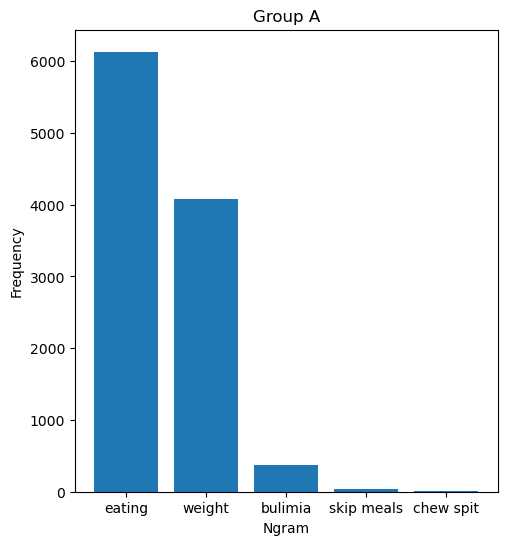

In [35]:
# create two bar plots side by side of the frequency the list of words in two groups:
group_a = ['eating', 'weight', 'bulimia', 'skip meals', 'chew spit']
group_b = ['bulimia', 'skip meals', 'chew spit']

# Bar plot for Group A
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(group_a, ngram_freq[ngram_freq['ngram'].isin(group_a)]['frequency'].values)
plt.title('Group A')
plt.xlabel('Ngram')
plt.ylabel('Frequency')

In [39]:
[print(n) for n in df['title_text'].values if 'caused' in n]

My friend got a lot skinnier since my ED got worse. Is it my fault?  
---
 In january I relapsed and fell back into my ED. I wont go into detail but after I relapsed I stopped eating in front of my friend, lets call her Lucy. Me and Lucy have been friends for a few years and we mostly hang out with only eachother since we don't really fit in with the rest of the class. She has also always been fairly skinny and has always eaten significantly less than everyone else, but I never noticed any signs of an ED in her. However, since I relapsed i've been skipping lunch in school which also makes Lucy skip lunch since she doesn't want to eat alone. I also started eating more proteinbars and "health foods" and stopped buying candy that both me and she loves, and Lucy also started picking up on my habits. I have been recovering and eating a lot more for the past 2 months, and now i'm noticing how skinny Lucy actually looks. I had also been mentioning my workouts infront of her deep in my ED and 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]